In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [109]:
df = pd.read_csv("virat.csv")
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [68]:
df.head()
#df[df.Runs > '75']
#df[df.Dismissal == 'not out']

df1 = df
df1['Runs'] = df1['Runs'].replace(r'\*', '', regex=True)

#df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



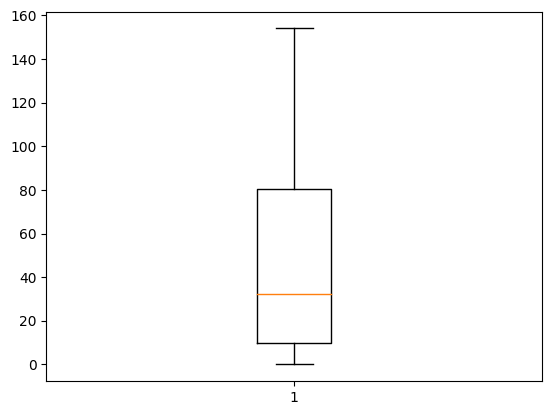

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [76]:
## Your code here
df1[~(df1.Dismissal == 'not out')]
df1.Runs = df1.Runs.astype('int32')
df1.Runs.value_counts()
#df1.Runs.astype('int32').dtype
plt.boxplot(df1.Runs)
plt.show()

df1.Runs.describe()



In [94]:
#Q3 + (1.5 * IQR)
#80.25 + (1.5*70.25)

df1['date'] = pd.to_datetime(df1['Start Date'])

df1['date'].dt.year.value_counts()

df1['year'] = df1['date'].dt.year



C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_129064\4013596648.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['date'] = pd.to_datetime(df1['Start Date'])


#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


In [113]:
#Your code here
print(df1.year.value_counts().sort_values().tail())
#2011 has 31 matches

yearly_average = df1.groupby('year')['Runs'].mean().sort_values
yearly_average

year
2012    11
2010    16
2014    17
2013    23
2011    31
Name: count, dtype: int64


<bound method Series.sort_values of year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64>

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [110]:
## Your code here



df1['Start_Date']= df['Start Date'].apply(lambda x: (x[-2:]))
print(df1.Start_Date.head())
print(df1['Start_Date'].value_counts())




0    08
1    08
2    08
3    08
4    08
Name: Start_Date, dtype: object
Start_Date
11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: count, dtype: int64


In [112]:
pd.pivot_table(df1, values='Runs',columns=['Start_Date'], aggfunc=np.mean)
pd.pivot_table(df1, values='Runs',columns=['Start_Date'], aggfunc=np.max)

Start_Date,08,09,10,11,12,13,14,15,16,17
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

D - [1, 14.4)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)D - [1, 14.4)


C:\Users\e5651595\AppData\Local\Temp\1\ipykernel_129064\1271861885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Mins = df1.Mins.replace('-', '', regex=True)


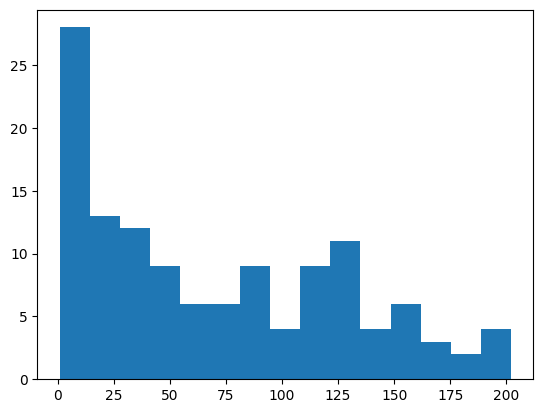

In [141]:
#Your code here
df1.Mins.value_counts()

df1.Mins = df1.Mins.replace('-', '', regex=True)
df1.Mins.value_counts()

plt.hist(df1.Mins.astype('float'), bins=15)
plt.show()


In [126]:
df1[df1.Mins == '']
df1 = df1[~(df1.Mins == '')]

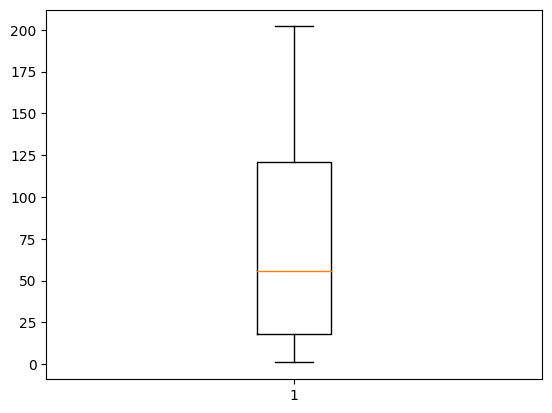

In [139]:
#plt.hist(df1.Mins, bins = 100)

df1.Mins.astype('float')

plt.boxplot(df1.Mins.astype('float'))
plt.show()